# 차량 데이터셋 시각화


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

## Q0. 데이터 불러오기

In [80]:
car_url = 'https://raw.githubusercontent.com/bokyungB/visualization_course/main/data/car_price_prediction.csv'
car = pd.read_csv(car_url,sep=",",encoding='utf-8')
car.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2


## Q1. 차량 데이터셋 파악

### Q1-1. 데이터 행열 파악

In [81]:
print(f'차량 데이터셋의 행, 열은 각각  {car.shape[0]}, {car.shape[1]} 개 이다')

차량 데이터셋의 행, 열은 각각  19237, 18 개 이다


### Q1-2. 데이터 고유성 파악

In [82]:
try:
  car.set_index('ID',inplace=True)
except Exception as e:
  # print(e)
  pass
else: 
  print('ID 열로 인덱스 바꾼 후 ')
  print(car.head())
finally:
  print('ID 열이 인덱스로 설정됐을때, 고유성 파악 ')
  id_unique = car.index.nunique()
  print(id_unique)
  print(f'{car.shape[0]-id_unique} 개의 중복이 있습니다.')

ID 열로 인덱스 바꾼 후 
          Price  Levy Manufacturer    Model  Prod. year   Category  \
ID                                                                   
45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
45774419   8467     -        HONDA      FIT        2006  Hatchback   
45769185   3607   862         FORD   Escape        2011       Jeep   
45809263  11726   446        HONDA      FIT        2014  Hatchback   

         Leather interior Fuel type Engine volume    Mileage  Cylinders  \
ID                                                                        
45654403              Yes    Hybrid           3.5  186005 km       6.00   
44731507               No    Petrol             3  192000 km       6.00   
45774419               No    Petrol           1.3  200000 km       4.00   
45769185              Yes    Hybrid           2.5  168966 km       4.00   
45809263              Yes    Petrol        

In [83]:
df = car.drop_duplicates(keep='first')
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2


### Q1-2. 범주형, 연속형 변수

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15725 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15725 non-null  int64  
 1   Levy              15725 non-null  object 
 2   Manufacturer      15725 non-null  object 
 3   Model             15725 non-null  object 
 4   Prod. year        15725 non-null  int64  
 5   Category          15725 non-null  object 
 6   Leather interior  15725 non-null  object 
 7   Fuel type         15725 non-null  object 
 8   Engine volume     15725 non-null  object 
 9   Mileage           15725 non-null  object 
 10  Cylinders         15725 non-null  float64
 11  Gear box type     15725 non-null  object 
 12  Drive wheels      15725 non-null  object 
 13  Doors             15725 non-null  object 
 14  Wheel             15725 non-null  object 
 15  Color             15725 non-null  object 
 16  Airbags           15725 non-nu

In [85]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Price,Prod. year,Cylinders,Airbags
count,15725.00,15725.00,15725.00,15725.00
mean,20279.44,2010.52,4.48,6.54
std,210639.02,6.01,1.13,4.07
min,1.00,1939.00,1.00,0.00
25%,7527.00,2008.00,4.00,4.00
50%,14166.00,2012.00,4.00,6.00
75%,23364.00,2014.00,4.00,12.00
max,26307500.00,2020.00,16.00,16.00


### Q1-3. 연속형 변수로 바꿀 수 있는 변수는?

의심가는 변수 셀 단위로 데이터 타입 체크 해보기

In [86]:
# ex ) Levy 세금
type(df.iloc[0,1])

str

## Q2.데이터 정제

In [87]:
# '-' 로 기입된 데이터 None으로 치환
car_df = df.replace('-',None)

# 세금은 수치 데이터이므로, 숫자로 변환 
car_df["Levy"] = pd.to_numeric(car_df["Levy"])


car_df.describe()

,Price,Levy,Prod. year,Cylinders,Airbags
count,15725.00,10041.00,15725.00,15725.00,15725.00
mean,20279.44,879.44,2010.52,4.48,6.54
std,210639.02,458.77,6.01,1.13,4.07
min,1.00,87.00,1939.00,1.00,0.00
25%,7527.00,640.00,2008.00,4.00,4.00
50%,14166.00,779.00,2012.00,4.00,6.00
75%,23364.00,1018.00,2014.00,4.00,12.00
max,26307500.00,11714.00,2020.00,16.00,16.00


### Q2-1. 연속형 변수로 의심가는 데이터 정제해보기

In [88]:
# ex) Mileage , 코드 입력하시오

## Q3. 범주형 데이터 시각화하기

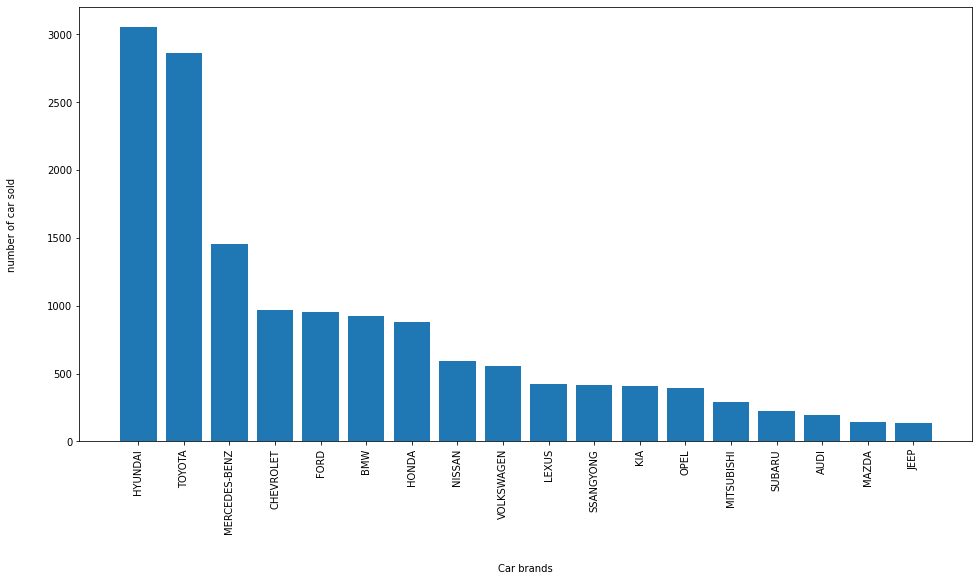

In [89]:
plt.figure(figsize=(16,8))
target=car_df['Manufacturer'].value_counts()
df1=target[target>100]
plt.bar(df1.index, df1)
plt.xticks(rotation=90)
plt.ylabel('number of car sold',labelpad=30)
plt.xlabel('Car brands',labelpad=30)
plt.show()

### Q3-1. 다른 범주형 변수 시각화하기

'Gear box type' : array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

'Category' : array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
                    'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
                    'Pickup'], dtype=object)

'Fuel type' : array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
                    'Hydrogen'], dtype=object)

'Drive wheels' : array(['4x4', 'Front', 'Rear'], dtype=object)

'Model' : array(['RX450', 'Equinox', 'FIT', ..., 'E230124', 'RX450FSPORT',
       'PriusCaqua'], dtype=object) , 1584개 

'Color' : array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Skyblue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelianred', 'Purple', 'Pink'], dtype=object)

In [90]:
# ex) Model, Color .. 

#### 추가 전처리

In [110]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

In [111]:
carc = car.copy()
carc.replace(regex={r'Turbo$': '', r'km$': '',r'\s*':''},inplace=True)
door_dict = {"04-May" : '04-05', "02-Mar" : '02-03'}
leather_dict = {"Yes":0,"No":1}
carc = carc.replace({"Doors": door_dict,"Leather interior":leather_dict})
coerce_df_columns_to_numeric(carc, ['Mileage','Engine volume'])
carc.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX450,2010,Jeep,0,Hybrid,3.50,186005,6.00,Automatic,4x4,04-05,Leftwheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,1,Petrol,3.00,192000,6.00,Tiptronic,4x4,04-05,Leftwheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,1,Petrol,1.30,200000,4.00,Variator,Front,04-05,Right-handdrive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,0,Hybrid,2.50,168966,4.00,Automatic,4x4,04-05,Leftwheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,0,Petrol,1.30,91901,4.00,Automatic,Front,04-05,Leftwheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45798355,8467,-,MERCEDES-BENZ,CLK200,1999,Coupe,0,CNG,2.00,300000,4.00,Manual,Rear,02-03,Leftwheel,Silver,5
45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,0,Petrol,2.40,161600,4.00,Tiptronic,Front,04-05,Leftwheel,Red,8
45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,0,Diesel,2.00,116365,4.00,Automatic,Front,04-05,Leftwheel,Grey,4


## Q4. 상관관계 표현하기

### Q4-1. heatmap으로 상관관계 표현

In [124]:
car_corr_df = carc.corr(method="pearson")
car_corr_df

,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Airbags
Price,1.00,0.01,-0.00,0.01,-0.00,0.01,-0.01
Prod. year,0.01,1.00,-0.39,-0.03,-0.06,-0.10,0.24
Leather interior,-0.00,-0.39,1.00,-0.27,0.03,-0.20,-0.17
Engine volume,0.01,-0.03,-0.27,1.00,-0.01,0.78,0.22
Mileage,-0.00,-0.06,0.03,-0.01,1.00,-0.00,-0.01
Cylinders,0.01,-0.10,-0.20,0.78,-0.00,1.00,0.18
Airbags,-0.01,0.24,-0.17,0.22,-0.01,0.18,1.00


C:\Users\bigda\AppData\Local\Temp\ipykernel_15080\959085197.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=['']+cols , rotation=60)
C:\Users\bigda\AppData\Local\Temp\ipykernel_15080\959085197.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=['']+cols)
C:\Users\bigda\AppData\Local\Temp\ipykernel_15080\959085197.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  heatmap.show()


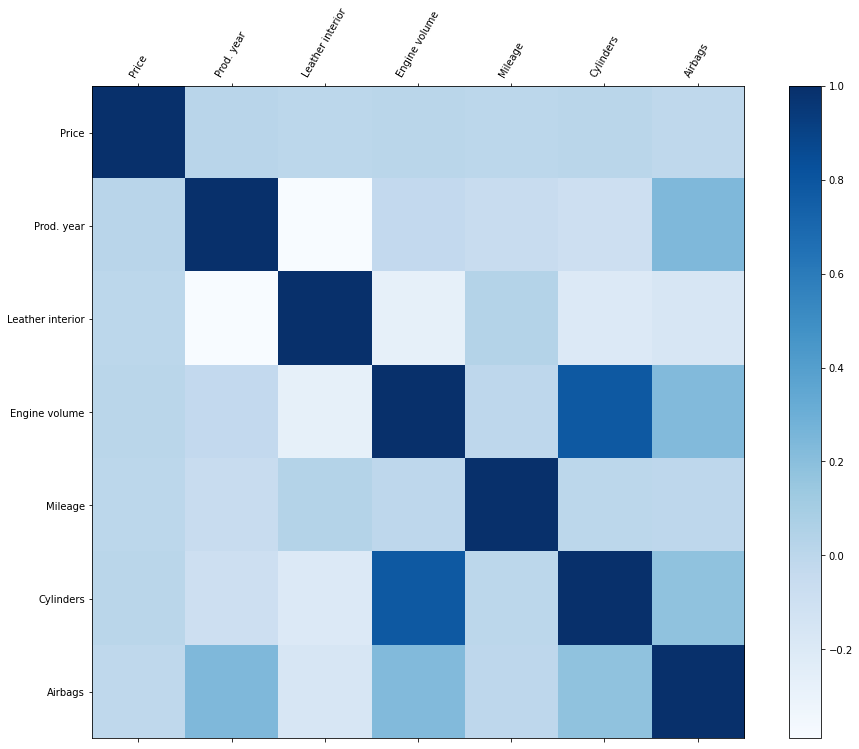

In [125]:
cols = car_corr_df.columns.tolist()
heatmap = plt.figure(figsize=(16,12)) # figsize
ax = heatmap.add_subplot(111)
cax = ax.matshow(car_corr_df, cmap= 'Blues', interpolation='nearest')
heatmap.colorbar(cax)
        
ax.set_xticklabels(labels=['']+cols , rotation=60)
ax.set_yticklabels(labels=['']+cols)
heatmap.show()

### Q4-2. scatter plot으로 상관관계 표현

In [127]:
car.describe()

,Price,Prod. year,Cylinders,Airbags
count,19237.00,19237.00,19237.00,19237.00
mean,18555.93,2010.91,4.58,6.58
std,190581.27,5.67,1.20,4.32
min,1.00,1939.00,1.00,0.00
25%,5331.00,2009.00,4.00,4.00
50%,13172.00,2012.00,4.00,6.00
75%,22075.00,2015.00,4.00,12.00
max,26307500.00,2020.00,16.00,16.00


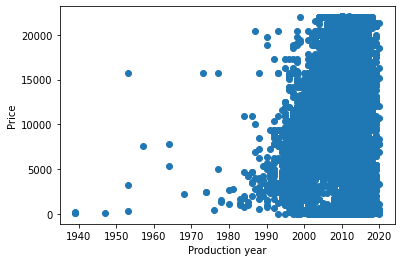

In [137]:
condition = car['Price'] <22075
y1 = car.loc[condition,'Price']
x1 = car.loc[condition,'Prod. year']

plt.scatter(x1,y1)
plt.xlabel('Production year')
plt.ylabel('Price')
plt.show()